In [13]:
import tensorflow as tf
import numpy as np
import zipfile
import io
import cv2
import os
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.metrics import confusion_matrix
from string import ascii_uppercase
import pandas as pd
import seaborn as sns

In [2]:
# Al ejecutar esta celda nos pide subir un archivo, lo pueden descargar de la carpeta Dataset: 
# https://drive.google.com/drive/u/1/folders/1GUku3uQ289hw8vhwZXRxB3r5M9jw_vUE (dataset.zip)

uploaded = files.upload()

Saving dataset.zip to dataset.zip


In [3]:
# Cuando terminé de extraer el zip, va a quedar en: /content/Dataset

data = zipfile.ZipFile(io.BytesIO(uploaded['dataset.zip']),'r')
data.extractall()

In [4]:
path_rose = "/content/Dataset/rose"

roses = os.listdir(path_rose)
training_roses = []
roses_validate_array = []

img_size = 150

for r in range(0, int(len(roses)*0.75)):
  path_img = os.path.join(path_rose, roses[r])

  img = cv2.imread(path_img)
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_resize = cv2.resize(img_rgb, (img_size, img_size))
  training_roses.append(img_resize)

for r in range(int(len(roses)*0.75), len(roses)):
  path_img = os.path.join(path_rose, roses[r])

  img = cv2.imread(path_img)
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_resize = cv2.resize(img_rgb, (img_size, img_size))
  roses_validate_array.append(img_resize)

In [5]:
path_sunflower = "/content/Dataset/sunflower"

sunflowers = os.listdir(path_sunflower)
training_sunflowers = []
sunflowers_validate_array = []

for s in range(0, int(len(sunflowers)*0.75)):
  path_img = os.path.join(path_sunflower, sunflowers[s])

  img = cv2.imread(path_img)
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_resize = cv2.resize(img_rgb, (img_size, img_size))
  training_sunflowers.append(img_resize)

for s in range(int(len(sunflowers)*0.75), len(sunflowers)):
  path_img = os.path.join(path_sunflower, sunflowers[s])

  img = cv2.imread(path_img)
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_resize = cv2.resize(img_rgb, (img_size, img_size))
  sunflowers_validate_array.append(img_resize)

In [6]:
print(len(training_roses))
print(len(training_sunflowers))

print(len(roses_validate_array))
print(len(sunflowers_validate_array))

750
770
250
257


In [7]:
training_roses = np.array(training_roses)
print(training_roses.shape)

training_sunflowers = np.array(training_sunflowers)
print(training_sunflowers.shape)

roses_validate_array = np.array(roses_validate_array)
print(roses_validate_array.shape)

sunflowers_validate_array = np.array(sunflowers_validate_array)
print(sunflowers_validate_array.shape)

(750, 150, 150, 3)
(770, 150, 150, 3)
(250, 150, 150, 3)
(257, 150, 150, 3)


In [8]:
dataset = np.concatenate([training_roses, training_sunflowers])
print(len(dataset))

dataset_array = np.array(dataset)
print(dataset_array.shape)

dataset_validate = np.concatenate([roses_validate_array, sunflowers_validate_array])
print(len(dataset_validate))

dataset_validate_array = np.array(dataset_validate)
print(dataset_validate_array.shape)

1520
(1520, 150, 150, 3)
507
(507, 150, 150, 3)


In [9]:
label_roses = np.repeat(0, 750)
print(len(label_roses))
#print(label_roses)

label_sunflowers = np.repeat(1, 770)
print(len(label_sunflowers))
#print(label_sunflowers)

label_validate_roses = np.repeat(0, 250)
print(len(label_validate_roses))

label_validate_sunflowers = np.repeat(1, 257)
print(len(label_validate_sunflowers))

750
770
250
257


In [10]:
class_names = ['Rosa', 'Girasol']

In [11]:
labels = np.concatenate([label_roses, label_sunflowers])
print(len(labels))
print(labels)

labels_array = np.array(labels)
print(labels_array.shape)

labels_validate = np.concatenate([label_validate_roses, label_validate_sunflowers])
print(len(labels_validate))
print(labels_validate)

labels_validate_array = np.array(labels_validate)
print(labels_validate_array.shape)

1520
[0 0 0 ... 1 1 1]
(1520,)
507
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

In [12]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape = (150, 150, 3)),
  tf.keras.layers.Dense(150, activation = 'relu'),
  tf.keras.layers.Dense(150, activation = 'relu'),
  tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape = (150, 150, 3)),
  tf.keras.layers.Dense(100, activation = 'relu'),
  tf.keras.layers.Dense(200, activation = 'relu'),
  tf.keras.layers.Dense(300, activation = 'relu'),
  tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_softmax = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape = (150, 150, 3)),
  tf.keras.layers.Dense(150, activation = 'relu'),
  tf.keras.layers.Dense(150, activation = 'relu'),
  tf.keras.layers.Dense(2, activation = 'softmax')
])

In [14]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model_2.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model_softmax.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [15]:
m = model.fit(dataset_array, labels_array, epochs = 10)
print("\n")
m_2 = model_2.fit(dataset_array, labels_array, epochs = 10)
print("\n")
m_sm = model_softmax.fit(dataset_array, labels_array, epochs = 10)
print("\n")

#validation_split = 0.15

Epoch 1/10
48/48 [==============================] - 4s 76ms/step - loss: 490.0419 - accuracy: 0.8053
Epoch 2/10
48/48 [==============================] - 4s 74ms/step - loss: 63.1689 - accuracy: 0.9151
Epoch 3/10
48/48 [==============================] - 4s 75ms/step - loss: 52.0269 - accuracy: 0.9289
Epoch 4/10
48/48 [==============================] - 4s 74ms/step - loss: 33.7846 - accuracy: 0.9434
Epoch 5/10
48/48 [==============================] - 4s 74ms/step - loss: 11.3516 - accuracy: 0.9678
Epoch 6/10
48/48 [==============================] - 4s 74ms/step - loss: 10.6944 - accuracy: 0.9599
Epoch 7/10
48/48 [==============================] - 4s 75ms/step - loss: 10.8998 - accuracy: 0.9592
Epoch 8/10
48/48 [==============================] - 4s 74ms/step - loss: 13.8654 - accuracy: 0.9520
Epoch 9/10
48/48 [==============================] - 4s 74ms/step - loss: 13.8062 - accuracy: 0.9553
Epoch 10/10
48/48 [==============================] - 4s 75ms/step - loss: 5.6294 - accuracy: 0.9704

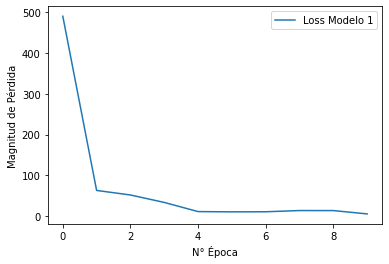

In [16]:
plt.xlabel("N° Época")
plt.ylabel("Magnitud de Pérdida")
plt.plot(m.history["loss"])
plt.legend(['Loss Modelo 1'])

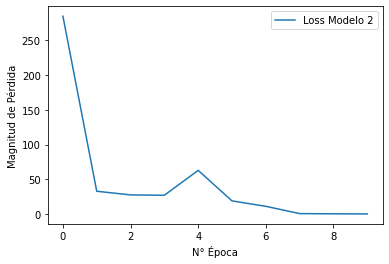

In [17]:
plt.xlabel("N° Época")
plt.ylabel("Magnitud de Pérdida")
plt.plot(m_2.history["loss"])
plt.legend(['Loss Modelo 2'])

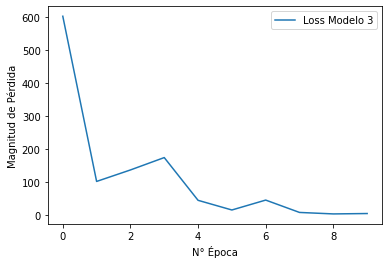

In [18]:
plt.xlabel("N° Época")
plt.ylabel("Magnitud de Pérdida")
plt.plot(m_sm.history["loss"])
plt.legend(['Loss Modelo 3'])

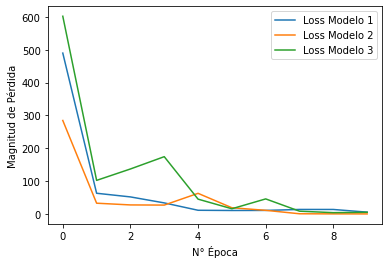

In [19]:
plt.xlabel("N° Época")
plt.ylabel("Magnitud de Pérdida")
plt.plot(m.history["loss"])

plt.xlabel("N° Época")
plt.ylabel("Magnitud de Pérdida")
plt.plot(m_2.history["loss"])

plt.xlabel("N° Época")
plt.ylabel("Magnitud de Pérdida")
plt.plot(m_sm.history["loss"])

plt.legend(['Loss Modelo 1', 'Loss Modelo 2', 'Loss Modelo 3'])



---



**TEST**



(150, 150, 3)
(1, 150, 150, 3)


Imagen a evaluar: 



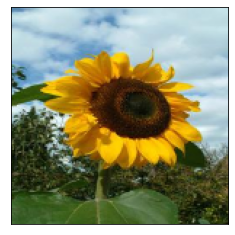



Modelo 1: 

[[1.]]
1.0
0
1
Resultado de la Clasificación: Girasol




Modelo 2: 

[[1.]]
1.0
0
1
Resultado de la Clasificación: Girasol




Modelo 3: 

[[0. 1.]]
1.0
1
Resultado de la Clasificación: Girasol


In [20]:
# Para probar con otra imagen del dataset hay que cambiar el id que recibe dataset_array

img_example = dataset_array[1040]
print(img_example.shape)
img_example = np.array([img_example]) # Otra forma de hacer lo mismo: np.expand_dims(img_example, 0)
print(img_example.shape)
print("\n")


print("Imagen a evaluar: \n")
plt.figure()
plt.imshow(dataset_array[1040])
plt.xticks([])
plt.yticks([])
plt.show()
print("\n")

print("Modelo 1: \n")
prediction = model.predict(img_example)
print(prediction)
print(np.sum(prediction))
print(np.argmax(prediction[0]))
print(int(prediction))
print("Resultado de la Clasificación: " + class_names[int(prediction)]) 

print("\n")
print("\n")

print("Modelo 2: \n")
prediction = model_2.predict(img_example)
print(prediction)
print(np.sum(prediction))
print(np.argmax(prediction[0]))
print(int(prediction))
print("Resultado de la Clasificación: " + class_names[int(prediction)]) 

print("\n")
print("\n")

print("Modelo 3: \n")
prediction_sm = model_softmax.predict(img_example)
print(prediction_sm)
print(np.sum(prediction_sm))
print(np.argmax(prediction_sm[0]))
print("Resultado de la Clasificación: " + class_names[np.argmax(prediction_sm)]) 

**GRÁFICOS**

In [21]:
true_array = []
prediction_array = []
prediction_m_2_array = []
prediction_m_sm_array = []
ids_array = []

for i in labels_validate:
  i = class_names[i]
  true_array.append(i)

print(true_array) 

for i in range(0, len(dataset_validate_array)):
  ie = dataset_validate_array[i]
  ie = np.array([ie])
  ids_array.append(i)
  prediction = model.predict(ie)
  prediction_m_2 = model_2.predict(ie)
  prediction_m_sm = model_softmax.predict(ie)
  prediction = class_names[int(prediction)]
  prediction_m_2 = class_names[int(prediction_m_2)]
  prediction_m_sm = class_names[np.argmax(prediction_m_sm)]
  #print(str(i) + " " + prediction)
  prediction_array.append(prediction)
  prediction_m_2_array.append(prediction_m_2)
  prediction_m_sm_array.append(prediction_m_sm)

print(prediction_array) 
print("\n")
print("\n")
print(prediction_m_2_array) 
print("\n")
print("\n")
print(prediction_m_sm_array) 

print(ids_array)

['Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa',

[[242  15]
 [  9 241]]


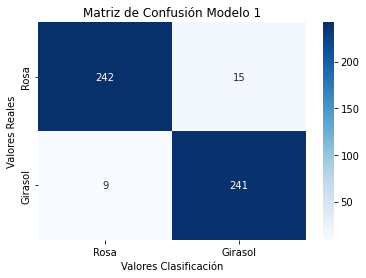



[[ 95 162]
 [  0 250]]


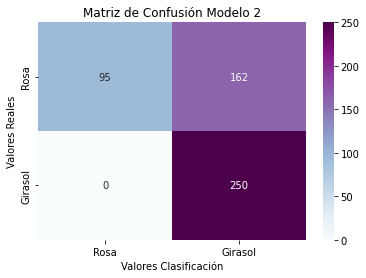



[[209  48]
 [  1 249]]


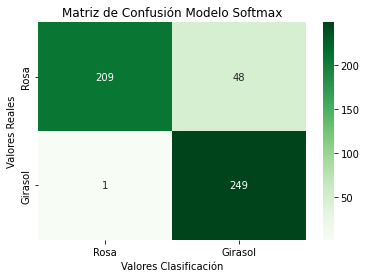

In [22]:
mc = confusion_matrix(true_array, prediction_array)
print(mc)

df_mc = pd.DataFrame(mc, index = class_names, columns = class_names)

grafica = sns.heatmap(df_mc, cmap='Blues', annot = True, fmt='g')

grafica.set(xlabel='Valores Clasificación', ylabel='Valores Reales')
plt.title("Matriz de Confusión Modelo 1")
plt.show()


mc_2 = confusion_matrix(true_array, prediction_m_2_array)
print("\n")
print(mc_2)

df_mc_2 = pd.DataFrame(mc_2, index = class_names, columns = class_names)

grafica = sns.heatmap(df_mc_2, cmap='BuPu', annot = True, fmt='g')

grafica.set(xlabel='Valores Clasificación', ylabel='Valores Reales')
plt.title("Matriz de Confusión Modelo 2")
plt.show()


mc_sm = confusion_matrix(true_array, prediction_m_sm_array)
print("\n")
print(mc_sm)

df_mc_sm = pd.DataFrame(mc_sm, index = class_names, columns = class_names)

grafica = sns.heatmap(df_mc_sm, cmap='Greens', annot = True, fmt='g')

grafica.set(xlabel='Valores Clasificación', ylabel='Valores Reales')
plt.title("Matriz de Confusión Modelo Softmax")
plt.show()

In [23]:
true_binary_array = []
prediction_binary_array = []
prediction_m_2_binary_array = []
prediction_m_sm_binary_array = []

for i in true_array:
  if(i == 'Rosa'):
    i = 0
  else:
    i = 1
  true_binary_array.append(i)

print(true_binary_array) 

def f(prediction_array, prediction_binary_array):
  for i in prediction_array:
    if(i == 'Rosa'):
      i = 0
    else:
      i = 1
    prediction_binary_array.append(i)

f(prediction_array, prediction_binary_array)
f(prediction_m_2_array, prediction_m_2_binary_array)
f(prediction_m_sm_array, prediction_m_sm_binary_array)

print(prediction_binary_array) 
print(prediction_m_2_binary_array) 
print(prediction_m_sm_binary_array) 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#print(true_array[:1000])
#print(prediction_array[1000:])

print("\n")

def metrics(true_array, prediction_array, prediction_binary_array, model):
  accuracy = accuracy_score(true_array, prediction_array)
  precision = precision_score(true_binary_array, prediction_binary_array)
  recall = recall_score(true_binary_array, prediction_binary_array)

  accuracy_r = accuracy_score(true_array[:250], prediction_array[:250])
  precision_r = precision_score(true_binary_array[:250], prediction_binary_array[:250])
  recall_r = recall_score(true_binary_array[:250], prediction_binary_array[:250], zero_division=0)

  accuracy_s = accuracy_score(true_array[250:], prediction_array[250:])
  precision_s = precision_score(true_binary_array[250:], prediction_binary_array[250:])
  recall_s = recall_score(true_binary_array[250:], prediction_binary_array[250:], zero_division=0)

  print("Accuracy %s: %0.4f" %(model, accuracy))
  print("Precision %s: %0.4f" %(model, precision))
  print("Recall %s: %0.4f" %(model, recall))

  print("\n")

  print("Accuracy Rosas %s: %0.4f" %(model, accuracy_r))
  print("Precision Rosas %s: %0.4f" %(model, precision_s))
  print("Recall Rosas %s: %0.4f" %(model, recall_s)) 

  print("\n")

  print("Accuracy Girasoles %s: %0.4f" %(model, accuracy_s))
  print("Precision Girasoles %s: %0.4f" %(model, precision_s))
  print("Recall Girasoles %s: %0.4f" %(model, recall_s))

metrics(true_array, prediction_array, prediction_binary_array, 'Modelo 1')
print("\n\n")

metrics(true_array, prediction_m_2_array, prediction_m_2_binary_array, 'Modelo 2')
print("\n\n")

metrics(true_array, prediction_m_sm_array, prediction_m_sm_binary_array, 'Modelo 3')



Accuracy Modelo 1: 0.9527
Precision Modelo 1: 0.9641
Recall Modelo 1: 0.9416


Accuracy Rosas Modelo 1: 0.9640
Precision Rosas Modelo 1: 1.0000
Recall Rosas Modelo 1: 0.9416


Accuracy Girasoles Modelo 1: 0.9416
Precision Girasoles Modelo 1: 1.0000
Recall Girasoles Modelo 1: 0.9416



Accuracy Modelo 2: 0.6805
Precision Modelo 2: 1.0000
Recall Modelo 2: 0.3696


Accuracy Rosas Modelo 2: 1.0000
Precision Rosas Modelo 2: 1.0000
Recall Rosas Modelo 2: 0.3696


Accuracy Girasoles Modelo 2: 0.3696
Precision Girasoles Modelo 2: 1.0000
Recall Girasoles Modelo 2: 0.3696



Accuracy Modelo 3: 0.9034
Precision Modelo 3: 0.9952
Recall Modelo 3: 0.8132


Accuracy Rosas Modelo 3: 0.9960
Precision Rosas Modelo 3: 1.0000
Recall Rosas Modelo 3: 0.8132


Accuracy Girasoles Modelo 3: 0.8132
Precision Girasoles Modelo 3: 1.0000
Recall Girasoles Modelo 3: 0.8132


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
